In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1
import torch
from tqdm import tqdm

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 1000
adam_lr = 1e-1
log_freq = 5

In [3]:
discarded_assets = [
    'MPWR',
    'FICO',
    'MTD',
    'NVR',
    'BKNG',
    'ESS',
    'ZBRA',
    'POOL',
    'AIZ',
    'TDY',
    'AMP',
    'FDS',
    'WAT'
]

df = pd.read_csv(path_to_data + 'minute_prices.csv', index_col=0, parse_dates=True, nrows=5)
picked_assets = df.columns.tolist()
picked_assets = [asset for asset in picked_assets if asset not in discarded_assets]
picked_assets

['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKR',
 'BLK',
 'BMY',
 'BR',
 'BRK.B',
 'BRO',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTRA',
 'CTSH',
 'CTVA',
 'CVS',
 'CVX',
 'CZR',
 'D',

In [4]:
# list to file
with open(path_to_data + 'picked_assets.txt', 'w') as f:
    for asset in picked_assets:
        f.write(f"{asset}\n")

Loading features: 0it [00:00, ?it/s]


cmf_dim: 126, asset_dim: 5, num_assets: 475


  0%|          | 0/1000 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


  0%|          | 4/1000 [03:31<14:20:36, 51.84s/it]

Sharpe Ratio for the epoch: 2.5616
Average Weights:



,Weight
GRMN,0.124840
IRM,0.122385
IP,0.121334
FFIV,0.100199
IBM,0.071248
...,...
ROST,0.000011
AAL,0.000010
BBY,0.000009
ALB,0.000008


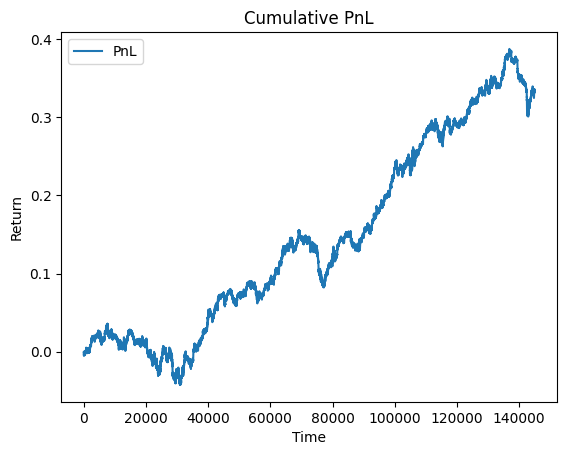

Sharpe Ratio for the epoch: 2.1253
Average Weights:



,Weight
IP,0.201513
FFIV,0.094213
IRM,0.091776
GRMN,0.086045
TRGP,0.083975
...,...
ROST,0.000009
AAL,0.000008
BBY,0.000007
ALB,0.000007


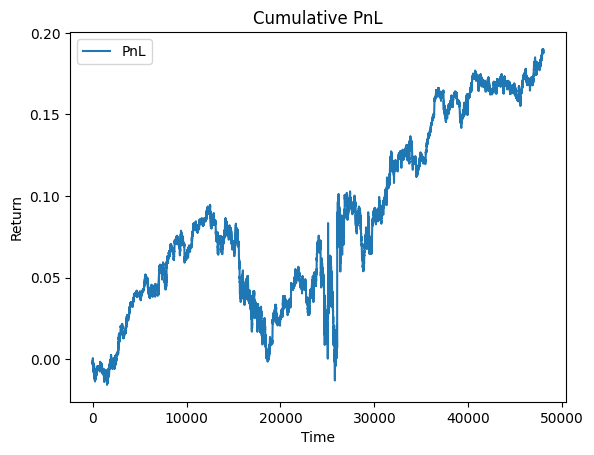

  1%|          | 9/1000 [07:39<13:38:07, 49.53s/it]

Sharpe Ratio for the epoch: 2.7026
Average Weights:



,Weight
GRMN,0.118642
IP,0.115052
IRM,0.109161
FFIV,0.108159
IBM,0.079456
...,...
DOW,0.000004
AAL,0.000004
BBY,0.000003
ALB,0.000003


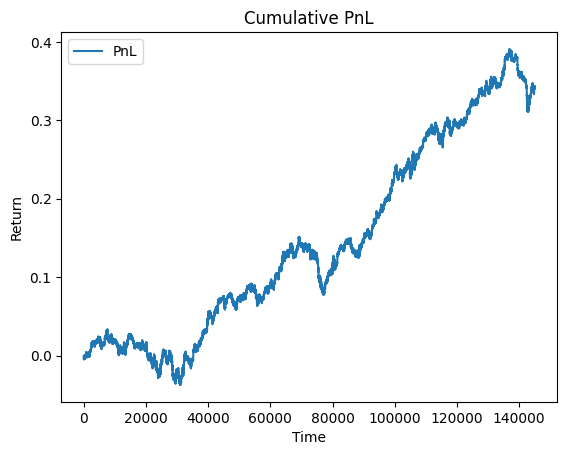

Sharpe Ratio for the epoch: 2.3025
Average Weights:



,Weight
IP,0.183828
FFIV,0.102293
GRMN,0.085883
IRM,0.083451
TRGP,0.078357
...,...
ROST,0.000003
AAL,0.000003
BBY,0.000003
ALB,0.000003


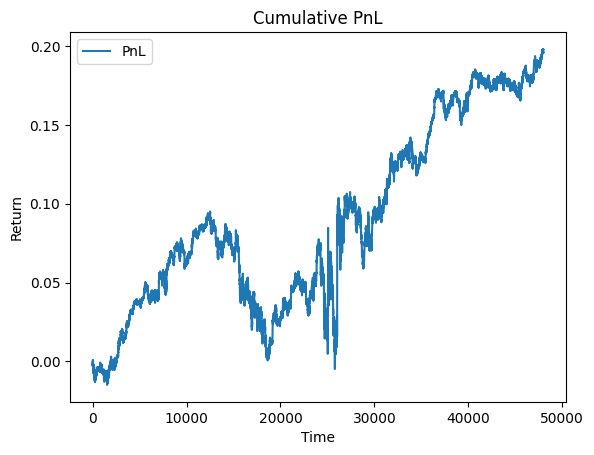

  1%|▏         | 14/1000 [12:03<14:23:53, 52.57s/it]

Sharpe Ratio for the epoch: 2.7442
Average Weights:



,Weight
GRMN,0.117407
IP,0.113239
FFIV,0.110162
IRM,0.105159
IBM,0.081309
...,...
DOW,0.000002
AAL,0.000002
BBY,0.000002
ALB,0.000001


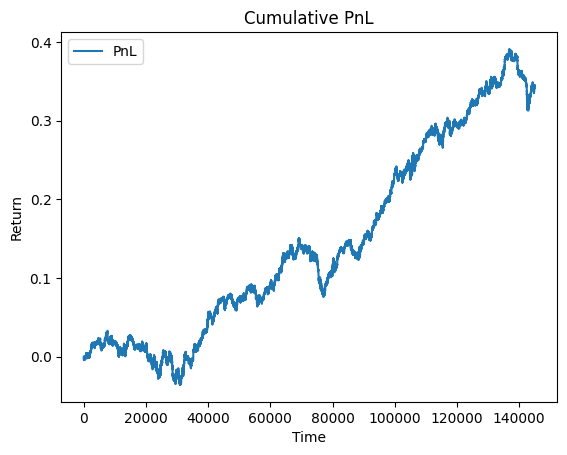

Sharpe Ratio for the epoch: 2.5055
Average Weights:



,Weight
IP,0.179880
FFIV,0.103328
GRMN,0.085654
IRM,0.080155
TRGP,0.078332
...,...
DOW,0.000002
AAL,0.000002
BBY,0.000001
ALB,0.000001


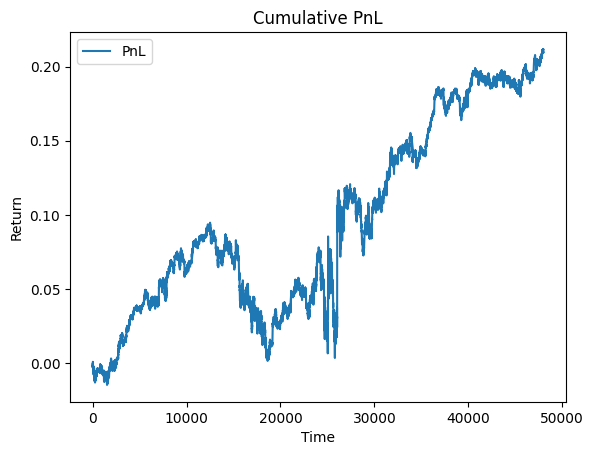

  2%|▏         | 19/1000 [16:24<14:03:45, 51.61s/it]

Sharpe Ratio for the epoch: 2.7722
Average Weights:



,Weight
GRMN,1.156762e-01
IP,1.115188e-01
FFIV,1.100230e-01
IRM,1.022140e-01
IBM,8.128746e-02
...,...
AAL,1.065620e-06
DOW,1.055092e-06
BBY,9.217345e-07
ALB,8.346615e-07


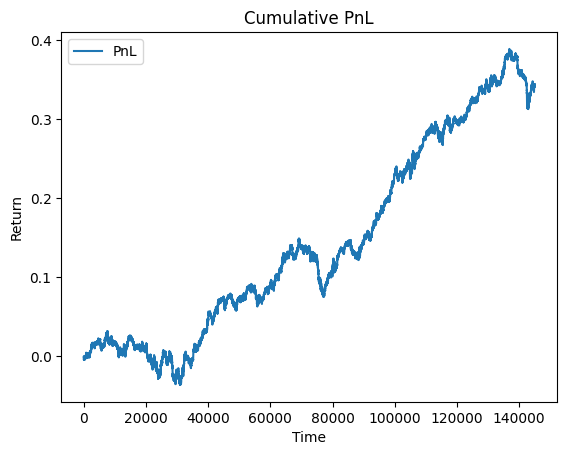

Sharpe Ratio for the epoch: 2.9256
Average Weights:



,Weight
IP,1.751234e-01
FFIV,1.012821e-01
GRMN,8.356724e-02
IRM,7.734924e-02
TRGP,7.694472e-02
...,...
AAL,9.918668e-07
DOW,9.793972e-07
BBY,8.561249e-07
ALB,7.747753e-07


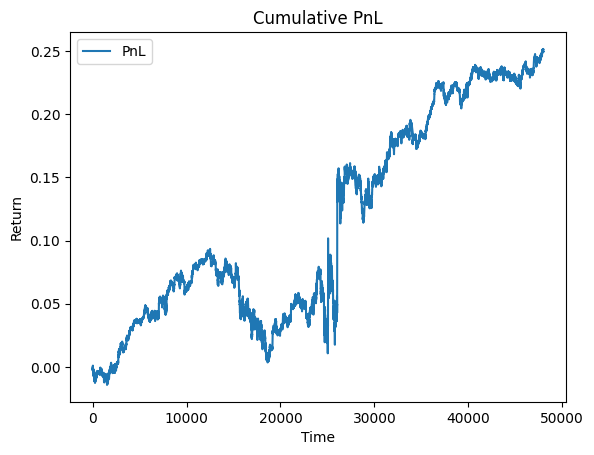

  2%|▏         | 24/1000 [20:30<13:21:46, 49.29s/it]

Sharpe Ratio for the epoch: 2.8851
Average Weights:



,Weight
GRMN,1.122973e-01
IP,1.068884e-01
FFIV,1.053151e-01
IRM,9.759626e-02
IBM,7.800674e-02
...,...
ROST,6.430428e-07
DOW,6.296106e-07
BBY,5.559510e-07
ALB,5.031289e-07


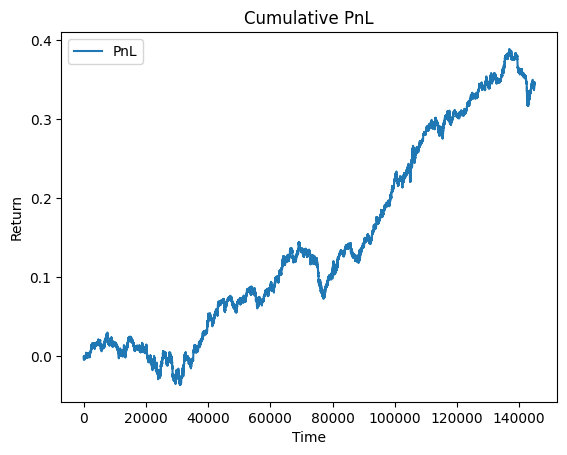

Sharpe Ratio for the epoch: 2.9720
Average Weights:



,Weight
IP,1.642981e-01
FFIV,9.435049e-02
GRMN,8.001759e-02
Cash,7.892415e-02
IRM,7.271604e-02
...,...
ROST,5.927564e-07
DOW,5.824345e-07
BBY,5.141784e-07
ALB,4.647480e-07


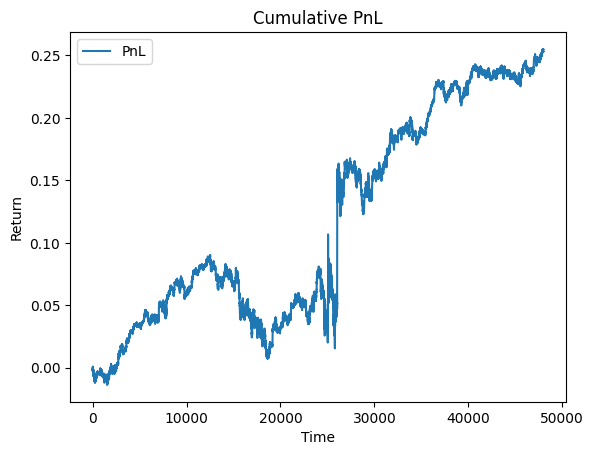

  3%|▎         | 29/1000 [24:31<13:02:09, 48.33s/it]

Sharpe Ratio for the epoch: 2.9563
Average Weights:



,Weight
Cash,1.172625e-01
GRMN,1.050922e-01
IP,1.002459e-01
FFIV,9.775957e-02
IRM,9.018127e-02
...,...
ROST,3.911390e-07
DOW,3.817586e-07
BBY,3.398692e-07
ALB,3.074159e-07


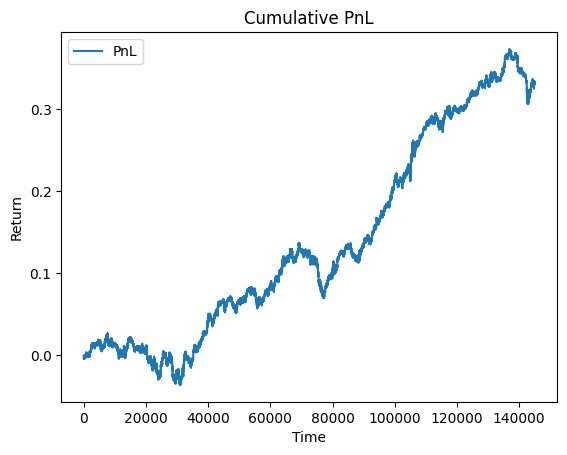

Sharpe Ratio for the epoch: 3.1434
Average Weights:



,Weight
IP,1.513595e-01
Cash,1.356221e-01
FFIV,8.557415e-02
GRMN,7.424021e-02
PM,6.674512e-02
...,...
ROST,3.584252e-07
DOW,3.510063e-07
BBY,3.122709e-07
ALB,2.820142e-07


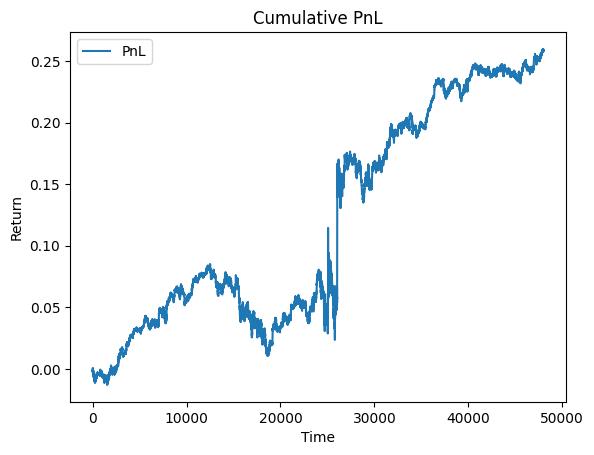

  3%|▎         | 34/1000 [28:32<12:55:49, 48.19s/it]

Sharpe Ratio for the epoch: 3.0419
Average Weights:



,Weight
Cash,2.048344e-01
GRMN,9.347803e-02
IP,8.970840e-02
FFIV,8.727361e-02
IRM,7.917323e-02
...,...
ROST,2.329296e-07
DOW,2.265962e-07
BBY,2.031433e-07
ALB,1.835456e-07


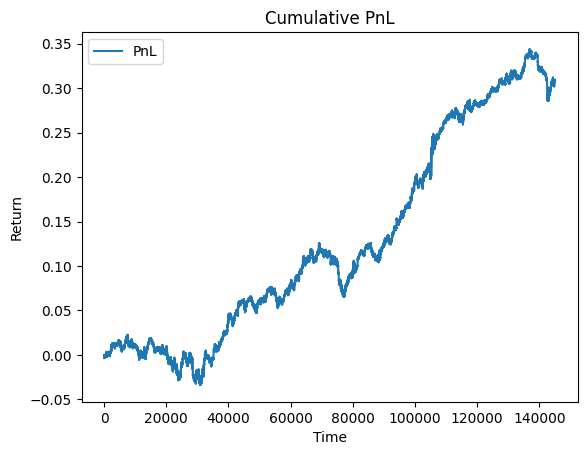

Sharpe Ratio for the epoch: 3.3830
Average Weights:



,Weight
Cash,2.324986e-01
IP,1.316499e-01
FFIV,7.416530e-02
GRMN,6.448706e-02
PM,5.966170e-02
...,...
ROST,2.095903e-07
DOW,2.045716e-07
BBY,1.832168e-07
ALB,1.652432e-07


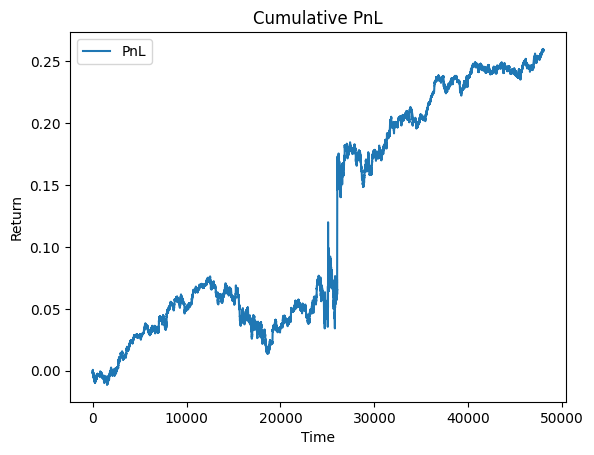

  4%|▍         | 39/1000 [32:33<12:53:26, 48.29s/it]

Sharpe Ratio for the epoch: 3.2926
Average Weights:



,Weight
Cash,5.318770e-01
GRMN,5.238002e-02
FFIV,5.100351e-02
IP,4.907208e-02
IRM,4.338659e-02
...,...
ROST,8.851945e-08
DOW,8.590510e-08
BBY,7.744480e-08
ALB,7.000003e-08


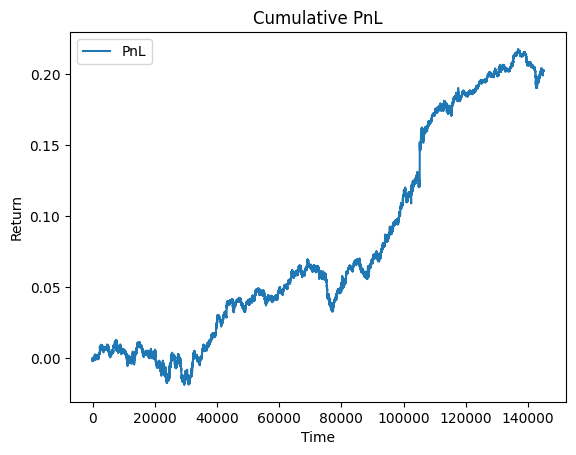

Sharpe Ratio for the epoch: 3.8628
Average Weights:



,Weight
Cash,6.464595e-01
IP,4.826542e-02
SNA,4.788799e-02
FFIV,3.055244e-02
GRMN,2.613705e-02
...,...
ROST,5.821379e-08
DOW,5.668484e-08
BBY,5.102602e-08
ALB,4.605924e-08


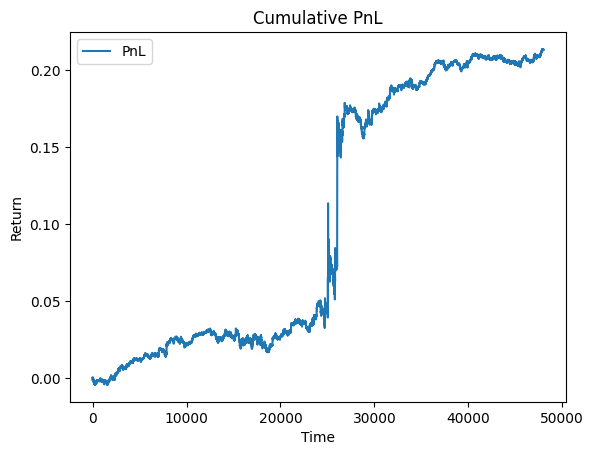

  4%|▍         | 44/1000 [36:53<13:45:54, 51.83s/it]

Sharpe Ratio for the epoch: 3.8223
Average Weights:



,Weight
Cash,8.885942e-01
SNA,1.849256e-02
IP,1.289449e-02
FFIV,1.074426e-02
GRMN,9.283778e-03
...,...
ROST,1.308512e-08
DOW,1.271376e-08
BBY,1.164106e-08
ALB,1.074762e-08


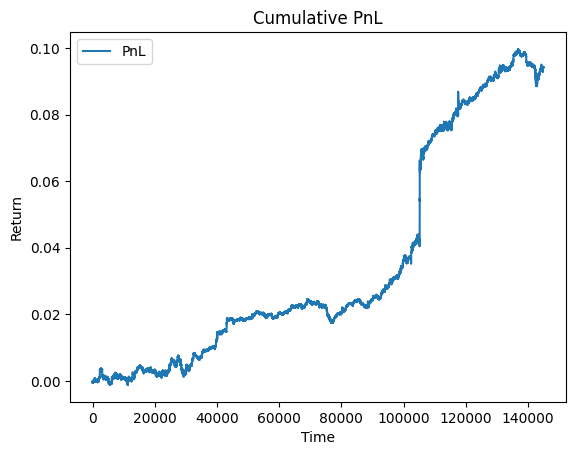

Sharpe Ratio for the epoch: 3.9302
Average Weights:



,Weight
Cash,8.512265e-01
SNA,3.646878e-02
IP,1.920853e-02
FFIV,1.113568e-02
GRMN,9.424866e-03
...,...
ROST,1.484560e-08
DOW,1.444967e-08
BBY,1.322467e-08
ALB,1.220213e-08


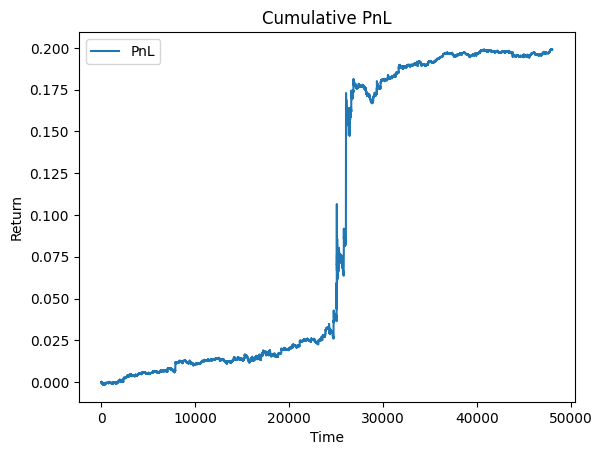

  5%|▍         | 49/1000 [41:17<14:16:53, 54.06s/it]

Sharpe Ratio for the epoch: 3.9333
Average Weights:



,Weight
Cash,9.003756e-01
SNA,1.563488e-02
IP,1.129790e-02
FFIV,1.085975e-02
GRMN,8.291767e-03
...,...
ROST,8.132377e-09
DOW,7.884289e-09
BBY,7.295522e-09
ALB,6.876872e-09


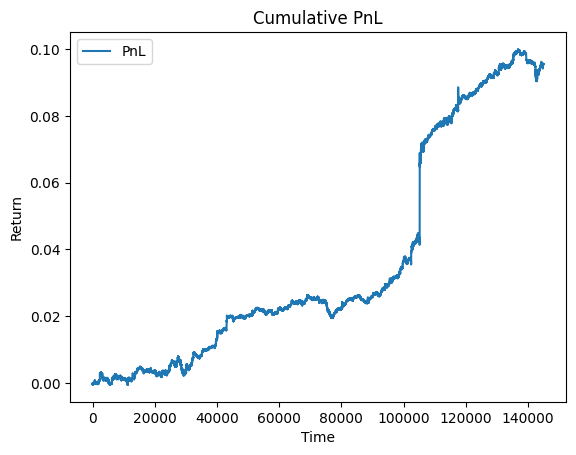

Sharpe Ratio for the epoch: 4.0669
Average Weights:



,Weight
Cash,8.661644e-01
SNA,3.198411e-02
IP,1.777904e-02
FFIV,1.069516e-02
GRMN,8.274595e-03
...,...
ROST,9.200098e-09
DOW,8.935532e-09
BBY,8.256673e-09
ALB,7.778453e-09


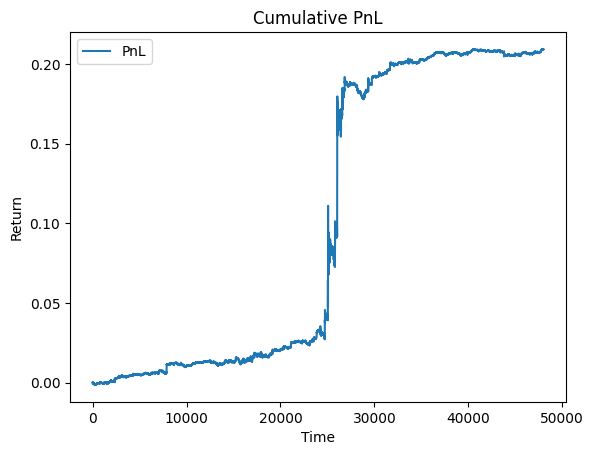

  5%|▌         | 54/1000 [45:49<14:10:26, 53.94s/it]

Sharpe Ratio for the epoch: 4.0280
Average Weights:



,Weight
Cash,9.083152e-01
SNA,1.330177e-02
FFIV,1.036686e-02
IP,9.951953e-03
GRMN,7.389938e-03
...,...
ROST,5.115215e-09
DOW,4.950826e-09
BBY,4.597614e-09
ALB,4.423603e-09


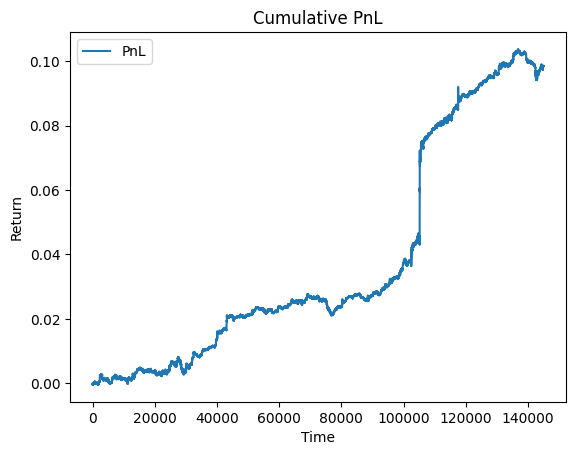

Sharpe Ratio for the epoch: 4.2303
Average Weights:



,Weight
Cash,8.808905e-01
SNA,2.638104e-02
IP,1.493317e-02
FFIV,9.193142e-03
GRMN,6.862978e-03
...,...
ROST,5.412136e-09
DOW,5.248891e-09
BBY,4.860960e-09
ALB,4.674588e-09


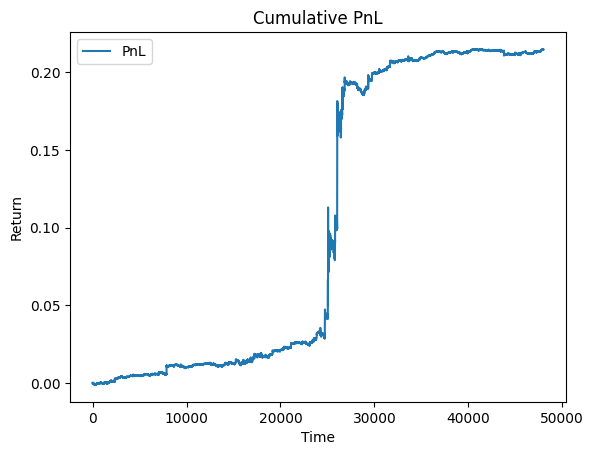

  6%|▌         | 59/1000 [50:17<14:00:56, 53.62s/it]

Sharpe Ratio for the epoch: 4.2005
Average Weights:



,Weight
Cash,9.125059e-01
SNA,1.142339e-02
FFIV,9.973792e-03
IP,9.041221e-03
GRMN,6.841114e-03
...,...
ROST,3.367915e-09
DOW,3.261081e-09
BBY,3.015039e-09
ALB,2.963726e-09


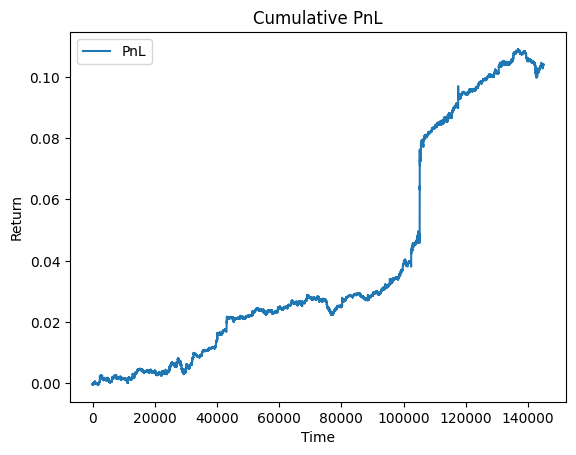

Sharpe Ratio for the epoch: 4.4247
Average Weights:



,Weight
Cash,8.827927e-01
SNA,2.424087e-02
IP,1.441180e-02
GWW,1.002277e-02
FFIV,9.215813e-03
...,...
ROST,3.620548e-09
DOW,3.512403e-09
BBY,3.236729e-09
ALB,3.179852e-09


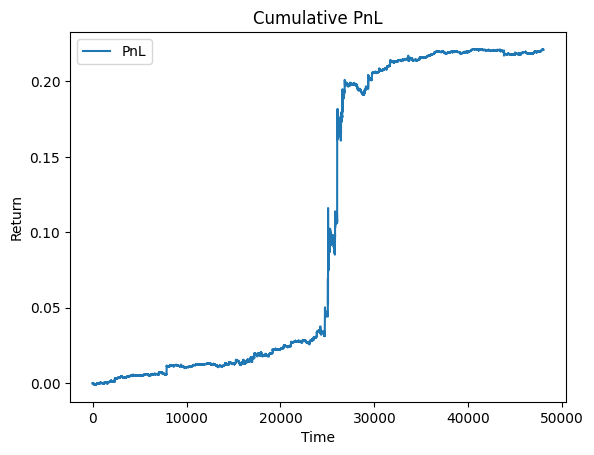

  6%|▋         | 64/1000 [54:42<13:53:21, 53.42s/it]

Sharpe Ratio for the epoch: 4.3271
Average Weights:



,Weight
Cash,9.162800e-01
SNA,1.018739e-02
FFIV,9.831387e-03
IP,8.452370e-03
IBM,6.483855e-03
...,...
ROST,2.246771e-09
DOW,2.177043e-09
ALB,2.010331e-09
BBY,1.998422e-09


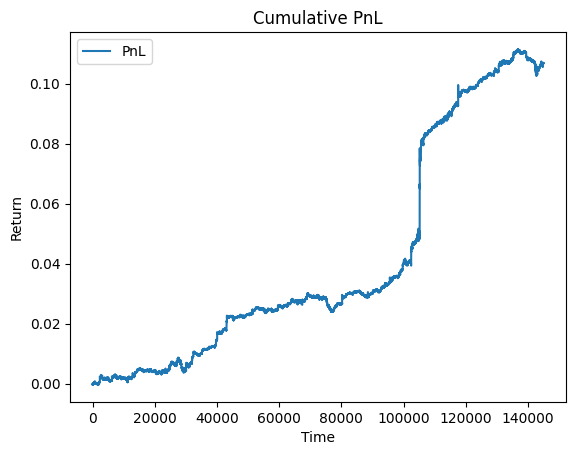

Sharpe Ratio for the epoch: 4.5261
Average Weights:



,Weight
Cash,8.848934e-01
SNA,2.352726e-02
IP,1.412369e-02
GWW,1.117953e-02
FFIV,9.290958e-03
...,...
ROST,2.449888e-09
DOW,2.378238e-09
ALB,2.187634e-09
BBY,2.175539e-09


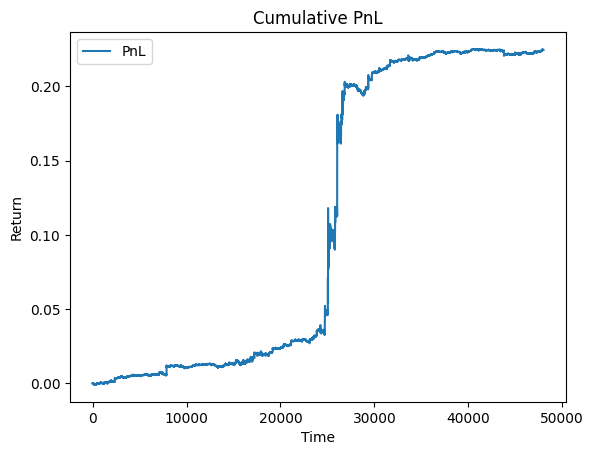

  7%|▋         | 69/1000 [59:03<13:31:50, 52.32s/it]

Sharpe Ratio for the epoch: 4.4272
Average Weights:



,Weight
Cash,9.189489e-01
FFIV,9.763864e-03
SNA,9.410436e-03
IP,8.113332e-03
IBM,6.553636e-03
...,...
ROST,1.517896e-09
DOW,1.471916e-09
ALB,1.382834e-09
BBY,1.342025e-09


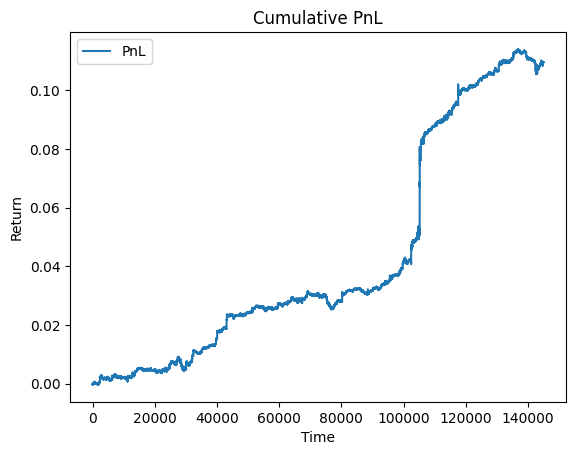

Sharpe Ratio for the epoch: 4.6854
Average Weights:



,Weight
Cash,8.855630e-01
SNA,2.336614e-02
IP,1.411616e-02
GWW,1.177615e-02
FFIV,9.462237e-03
...,...
ROST,1.680115e-09
DOW,1.632153e-09
ALB,1.527284e-09
BBY,1.482848e-09


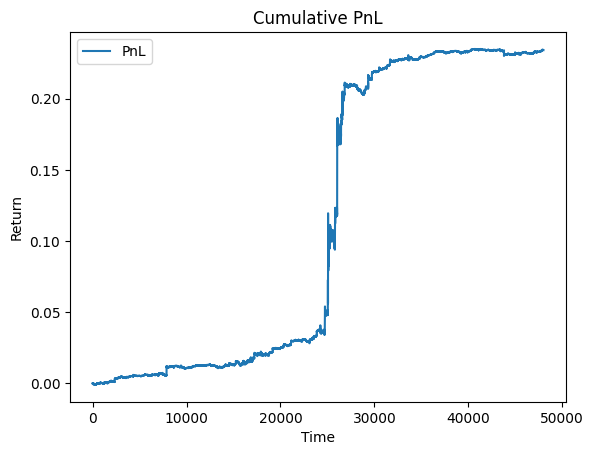

  7%|▋         | 74/1000 [1:03:24<13:21:31, 51.93s/it]

Sharpe Ratio for the epoch: 4.5144
Average Weights:



,Weight
Cash,9.214193e-01
FFIV,9.689142e-03
SNA,8.803345e-03
IP,7.828445e-03
IBM,6.574213e-03
...,...
ROST,1.024875e-09
DOW,9.943912e-10
ALB,9.509523e-10
BBY,9.013003e-10


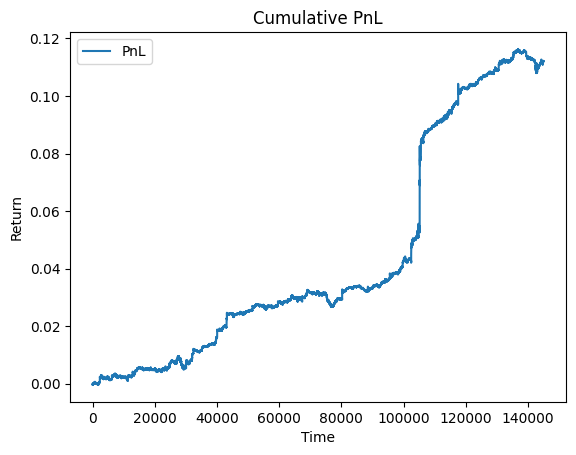

Sharpe Ratio for the epoch: 4.8328
Average Weights:



,Weight
Cash,8.865694e-01
SNA,2.321742e-02
IP,1.407366e-02
GWW,1.208943e-02
FFIV,9.577283e-03
...,...
ROST,1.146490e-09
DOW,1.114264e-09
ALB,1.061143e-09
BBY,1.006273e-09


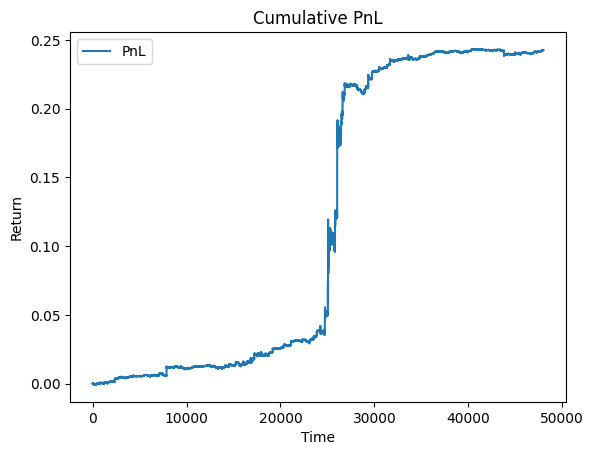

  8%|▊         | 79/1000 [1:07:47<13:28:08, 52.65s/it]

Sharpe Ratio for the epoch: 4.5950
Average Weights:



,Weight
Cash,9.236204e-01
FFIV,9.629442e-03
SNA,8.324427e-03
IP,7.557475e-03
IBM,6.546705e-03
...,...
ROST,6.918316e-10
DOW,6.719073e-10
ALB,6.538503e-10
BBY,6.057607e-10


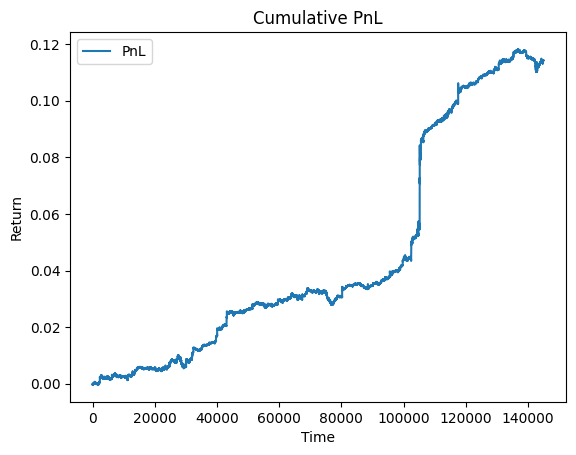

Sharpe Ratio for the epoch: 4.8941
Average Weights:



,Weight
Cash,8.878933e-01
SNA,2.298228e-02
IP,1.393094e-02
GWW,1.224672e-02
FFIV,9.658855e-03
...,...
ROST,7.783669e-10
DOW,7.571629e-10
ALB,7.335614e-10
BBY,6.801116e-10


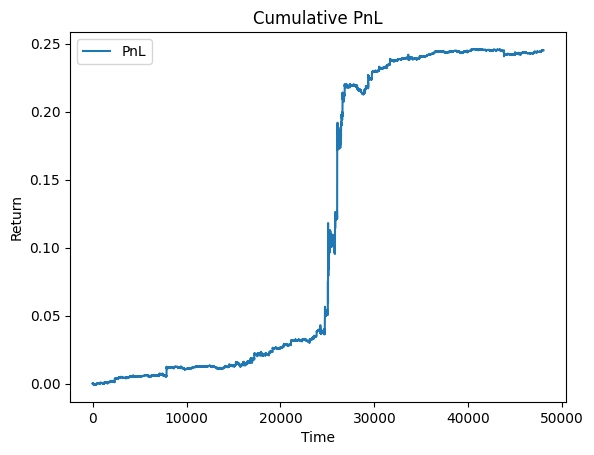

  8%|▊         | 84/1000 [1:12:18<13:40:05, 53.72s/it]

Sharpe Ratio for the epoch: 4.7852
Average Weights:



,Weight
Cash,9.290428e-01
FFIV,9.009514e-03
SNA,7.357650e-03
IP,6.826204e-03
IBM,5.957158e-03
...,...
ROST,4.283512e-10
DOW,4.159652e-10
ALB,4.110344e-10
BBY,3.731948e-10


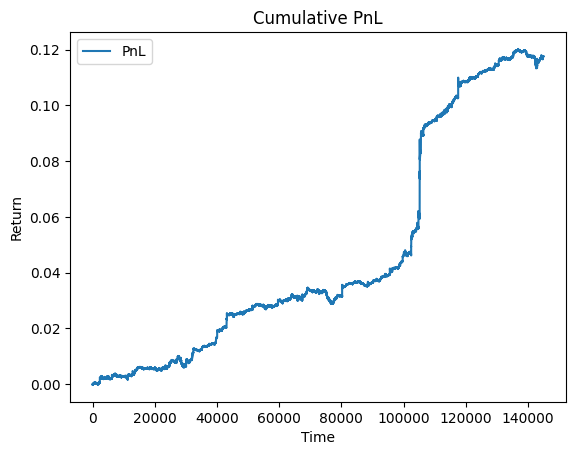

Sharpe Ratio for the epoch: 4.9002
Average Weights:



,Weight
Cash,8.973113e-01
SNA,2.176610e-02
IP,1.253480e-02
GWW,1.121114e-02
FFIV,8.757656e-03
...,...
ROST,4.619211e-10
DOW,4.490629e-10
ALB,4.415774e-10
BBY,4.013126e-10


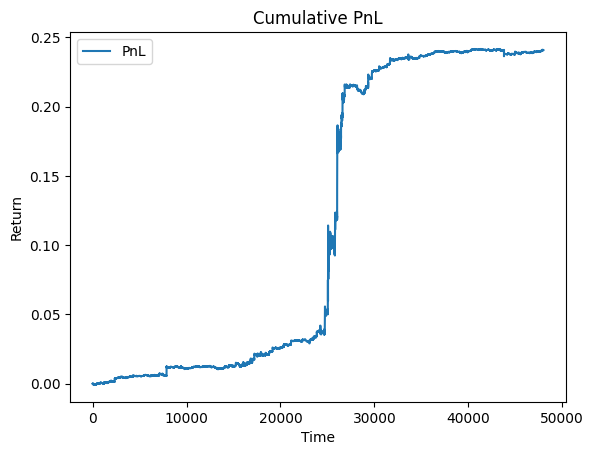

  9%|▉         | 89/1000 [1:16:47<13:48:03, 54.54s/it]

Sharpe Ratio for the epoch: 4.9508
Average Weights:



,Weight
Cash,9.314394e-01
FFIV,8.944424e-03
SNA,6.970060e-03
IP,6.578899e-03
IBM,5.928378e-03
...,...
ROST,2.884838e-10
ALB,2.814118e-10
DOW,2.799346e-10
BBY,2.501581e-10


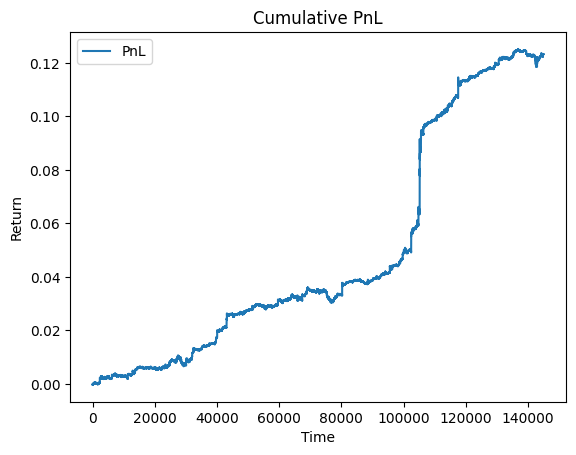

Sharpe Ratio for the epoch: 4.9315
Average Weights:



,Weight
Cash,8.984955e-01
SNA,2.181585e-02
IP,1.230255e-02
GWW,1.105652e-02
FFIV,8.830422e-03
...,...
ROST,3.127520e-10
ALB,3.039340e-10
DOW,3.038196e-10
BBY,2.704509e-10


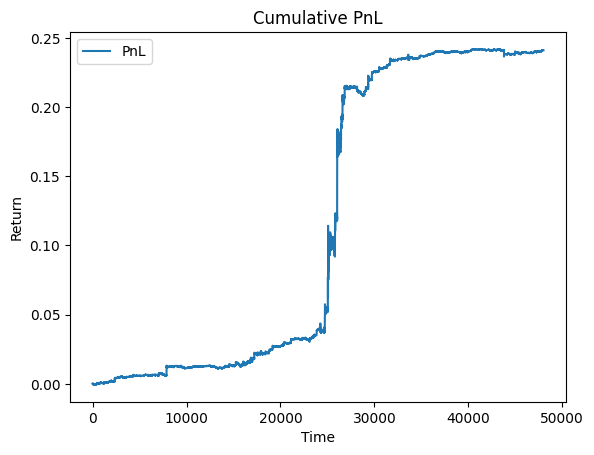

  9%|▉         | 94/1000 [1:21:40<14:35:21, 57.97s/it]

Sharpe Ratio for the epoch: 5.0832
Average Weights:



,Weight
Cash,9.334226e-01
FFIV,8.806555e-03
SNA,6.670339e-03
IP,6.263230e-03
IBM,5.838434e-03
...,...
ROST,1.923108e-10
ALB,1.910059e-10
DOW,1.866580e-10
BBY,1.663112e-10


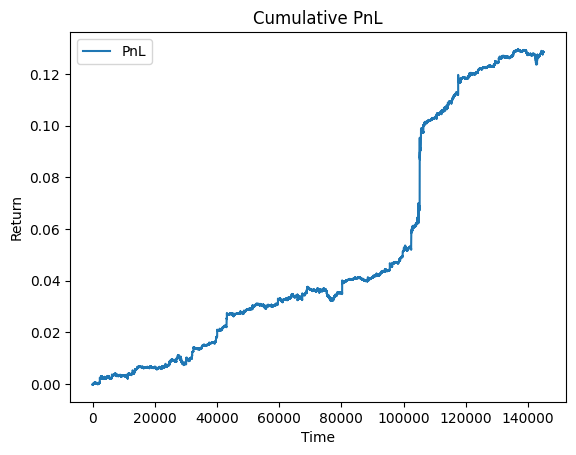

Sharpe Ratio for the epoch: 4.9054
Average Weights:



,Weight
Cash,9.051746e-01
SNA,2.140959e-02
IP,1.119782e-02
GWW,1.022186e-02
FFIV,8.405824e-03
...,...
ROST,1.926822e-10
ALB,1.904828e-10
DOW,1.872394e-10
BBY,1.661555e-10


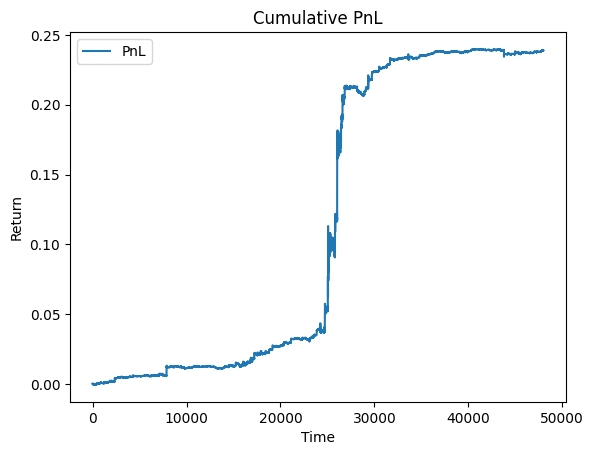

 10%|▉         | 99/1000 [1:26:06<13:16:06, 53.01s/it]

Sharpe Ratio for the epoch: 5.2492
Average Weights:



,Weight
Cash,9.343288e-01
FFIV,8.720001e-03
SNA,6.390992e-03
IP,6.202914e-03
IBM,5.787470e-03
...,...
ALB,1.301337e-10
ROST,1.286928e-10
DOW,1.250693e-10
BBY,1.112380e-10


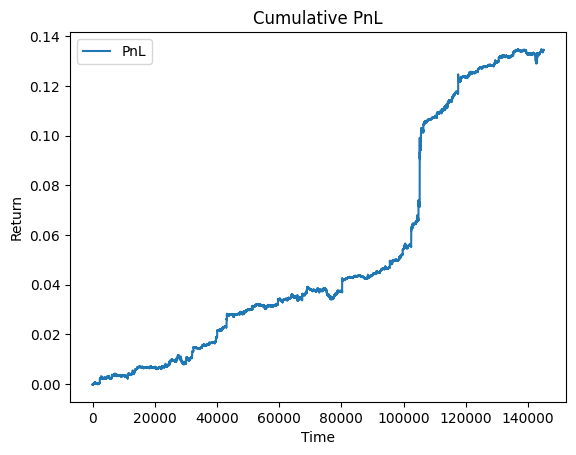

Sharpe Ratio for the epoch: 4.9464
Average Weights:



,Weight
Cash,9.053381e-01
SNA,2.133520e-02
IP,1.132785e-02
GWW,9.970075e-03
FFIV,8.454609e-03
...,...
ALB,1.320171e-10
ROST,1.311804e-10
DOW,1.276321e-10
BBY,1.130837e-10


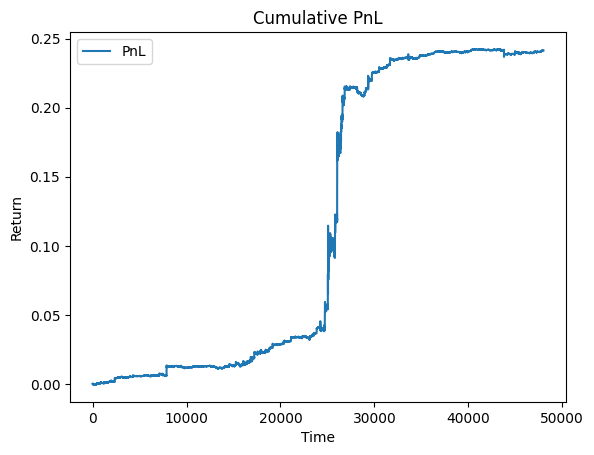

 10%|█         | 104/1000 [1:30:17<12:39:11, 50.84s/it]

Sharpe Ratio for the epoch: 5.3701
Average Weights:



,Weight
Cash,9.352558e-01
FFIV,8.757875e-03
SNA,6.280038e-03
IP,6.138843e-03
IBM,5.835254e-03
...,...
AAL,8.847015e-11
ROST,8.727462e-11
DOW,8.500431e-11
BBY,7.555753e-11


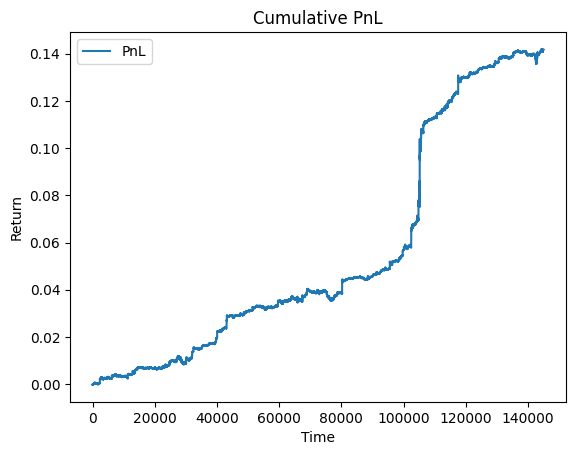

Sharpe Ratio for the epoch: 5.0217
Average Weights:



,Weight
Cash,9.050320e-01
SNA,2.107654e-02
IP,1.133921e-02
GWW,9.912592e-03
FFIV,8.382581e-03
...,...
AAL,9.099999e-11
ROST,9.002361e-11
DOW,8.777170e-11
BBY,7.772399e-11


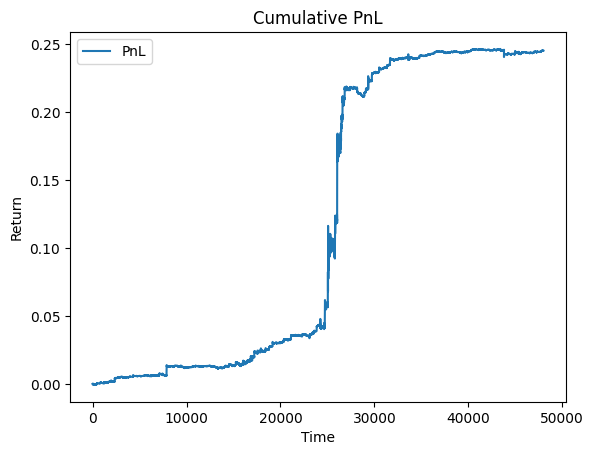

 11%|█         | 109/1000 [1:34:19<12:04:10, 48.77s/it]

Sharpe Ratio for the epoch: 5.5111
Average Weights:



,Weight
Cash,9.357058e-01
FFIV,8.697129e-03
SNA,6.141228e-03
IP,6.138459e-03
IBM,5.783178e-03
...,...
AAL,6.086644e-11
ROST,5.999013e-11
DOW,5.857970e-11
BBY,5.204596e-11


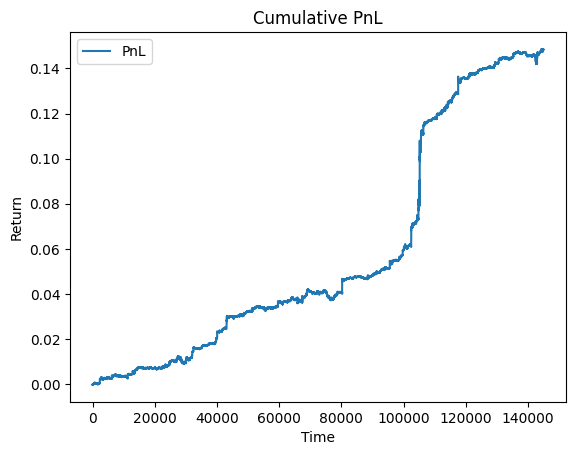

Sharpe Ratio for the epoch: 5.0715
Average Weights:



,Weight
Cash,9.050644e-01
SNA,2.115851e-02
IP,1.140373e-02
GWW,9.789831e-03
FFIV,8.405250e-03
...,...
AAL,6.234997e-11
ROST,6.164198e-11
DOW,6.024962e-11
BBY,5.332637e-11


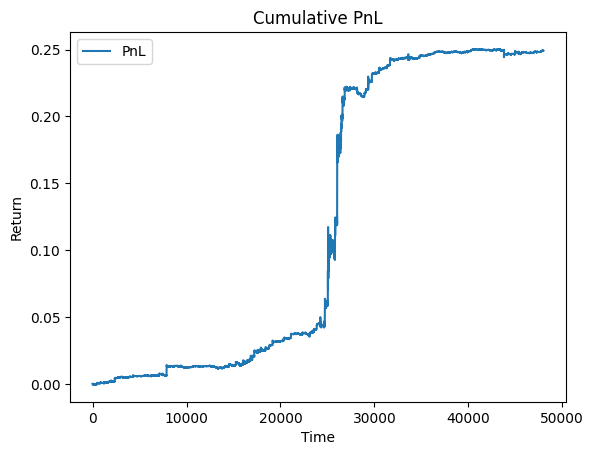

 11%|█▏        | 114/1000 [1:38:22<11:54:52, 48.41s/it]

Sharpe Ratio for the epoch: 5.6370
Average Weights:



,Weight
Cash,9.357920e-01
FFIV,8.709173e-03
IP,6.169892e-03
SNA,6.078851e-03
IBM,5.780374e-03
...,...
AAL,4.217186e-11
ROST,4.152139e-11
DOW,4.064379e-11
BBY,3.610444e-11


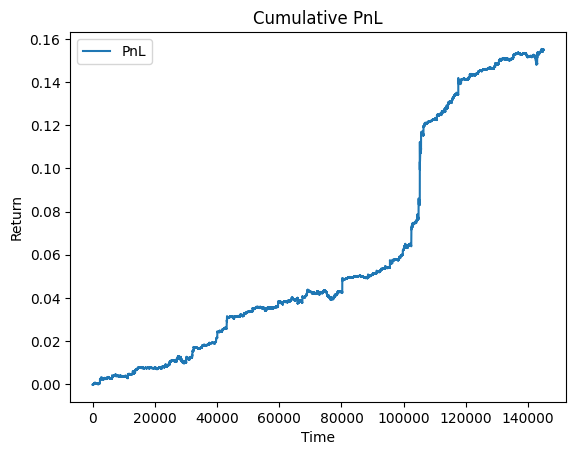

Sharpe Ratio for the epoch: 5.1371
Average Weights:



,Weight
Cash,9.041011e-01
SNA,2.129259e-02
IP,1.154547e-02
GWW,9.781117e-03
FFIV,8.528744e-03
...,...
AAL,4.339039e-11
ROST,4.286186e-11
DOW,4.199109e-11
BBY,3.715925e-11


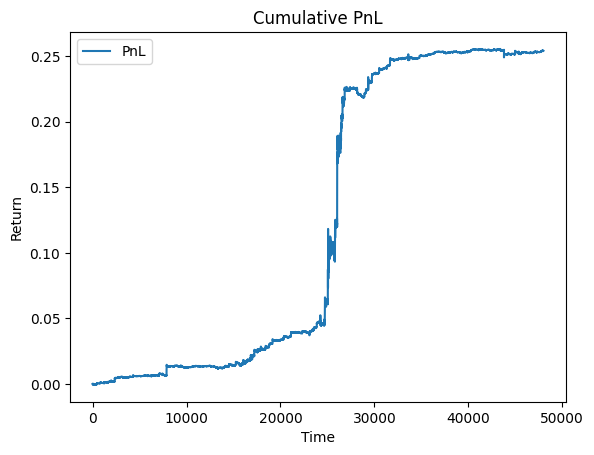

 12%|█▏        | 119/1000 [1:42:23<11:48:41, 48.27s/it]

Sharpe Ratio for the epoch: 5.7546
Average Weights:



,Weight
Cash,9.356524e-01
FFIV,8.777881e-03
IP,6.195799e-03
SNA,6.048313e-03
IBM,5.784241e-03
...,...
TEL,2.930442e-11
ROST,2.885583e-11
DOW,2.830893e-11
BBY,2.514731e-11


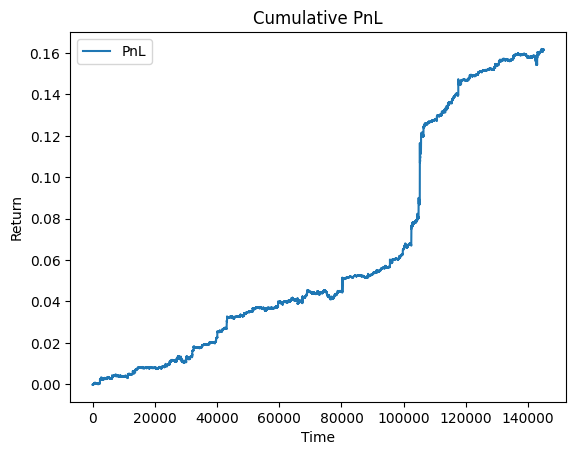

Sharpe Ratio for the epoch: 5.1926
Average Weights:



,Weight
Cash,9.029178e-01
SNA,2.143631e-02
IP,1.166948e-02
GWW,9.820722e-03
FFIV,8.701489e-03
...,...
AAL,3.030541e-11
ROST,2.991338e-11
DOW,2.936835e-11
BBY,2.598794e-11


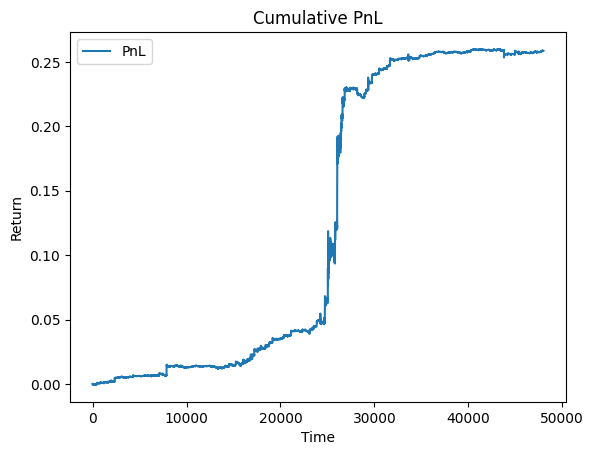

 12%|█▏        | 124/1000 [1:46:26<11:49:12, 48.58s/it]

Sharpe Ratio for the epoch: 5.8634
Average Weights:



,Weight
Cash,9.355806e-01
FFIV,8.800584e-03
IP,6.193043e-03
SNA,6.020323e-03
IBM,5.772118e-03
...,...
TEL,2.030069e-11
ROST,2.002993e-11
DOW,1.968827e-11
BBY,1.748967e-11


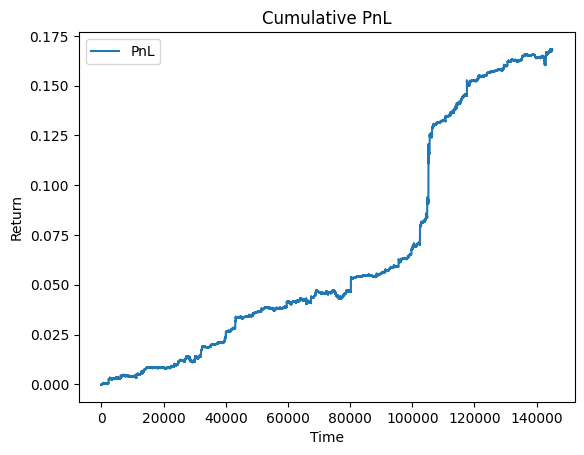

Sharpe Ratio for the epoch: 5.2341
Average Weights:



,Weight
Cash,9.020461e-01
SNA,2.151198e-02
IP,1.170319e-02
GWW,9.854374e-03
FFIV,8.813655e-03
...,...
AAL,2.108851e-11
ROST,2.080136e-11
DOW,2.045970e-11
BBY,1.810422e-11


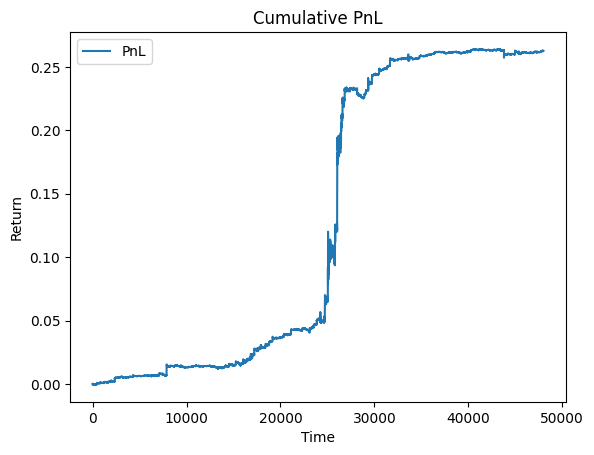

 13%|█▎        | 129/1000 [1:50:33<12:03:04, 49.81s/it]

Sharpe Ratio for the epoch: 5.9630
Average Weights:



,Weight
Cash,9.355183e-01
FFIV,8.804083e-03
IP,6.159228e-03
SNA,5.990057e-03
IBM,5.755721e-03
...,...
TEL,1.406850e-11
ROST,1.390164e-11
DOW,1.368579e-11
BBY,1.215843e-11


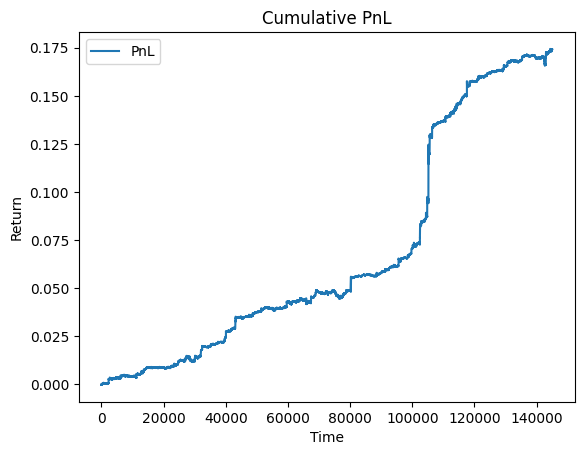

Sharpe Ratio for the epoch: 5.2632
Average Weights:



,Weight
Cash,9.012452e-01
SNA,2.153508e-02
IP,1.167822e-02
GWW,9.888013e-03
FFIV,8.902601e-03
...,...
AAL,1.466623e-11
ROST,1.446164e-11
DOW,1.424489e-11
BBY,1.260508e-11


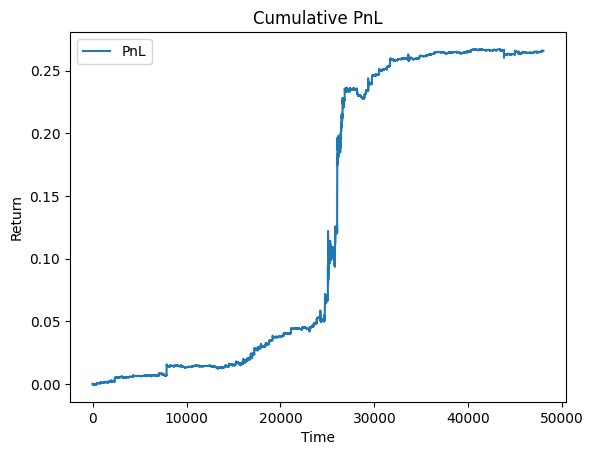

 13%|█▎        | 134/1000 [1:54:54<12:20:03, 51.27s/it]

Sharpe Ratio for the epoch: 6.0552
Average Weights:



,Weight
Cash,9.354406e-01
FFIV,8.780833e-03
IP,6.116038e-03
SNA,5.958652e-03
IBM,5.729790e-03
...,...
TEL,9.762166e-12
ROST,9.658134e-12
DOW,9.517729e-12
BBY,8.457124e-12


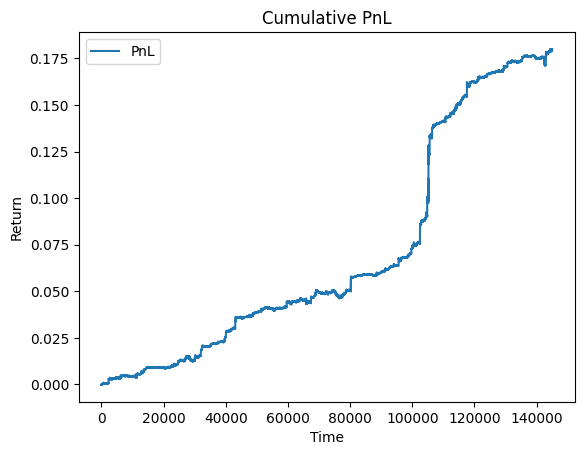

Sharpe Ratio for the epoch: 5.2854
Average Weights:



,Weight
Cash,9.003670e-01
SNA,2.153957e-02
IP,1.164089e-02
GWW,9.936905e-03
FFIV,8.963141e-03
...,...
TEL,1.020760e-11
ROST,1.007515e-11
DOW,9.933029e-12
BBY,8.790823e-12


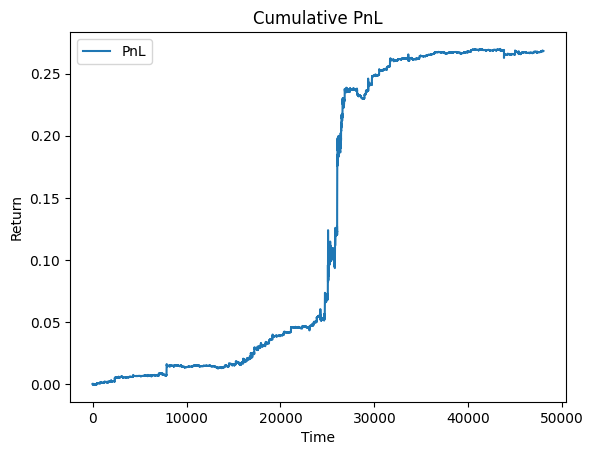

 14%|█▍        | 139/1000 [1:59:38<13:14:05, 55.34s/it]

Sharpe Ratio for the epoch: 6.1438
Average Weights:



,Weight
Cash,9.352933e-01
FFIV,8.747748e-03
IP,6.067383e-03
SNA,5.934899e-03
IBM,5.701265e-03
...,...
TEL,6.796738e-12
ROST,6.729201e-12
DOW,6.633557e-12
BBY,5.897003e-12


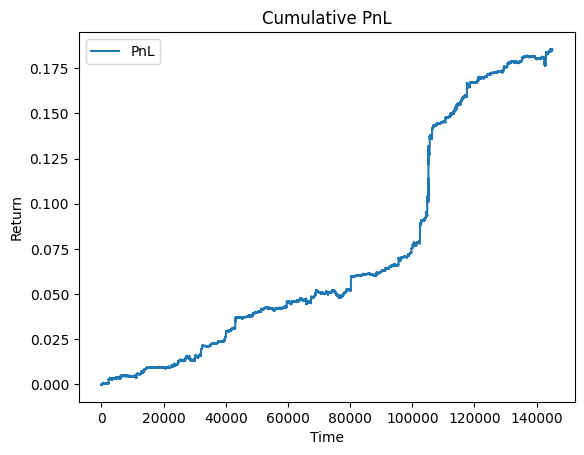

Sharpe Ratio for the epoch: 5.3013
Average Weights:



,Weight
Cash,8.994935e-01
SNA,2.154043e-02
IP,1.158209e-02
GWW,9.990755e-03
FFIV,9.004489e-03
...,...
TEL,7.123150e-12
ROST,7.036469e-12
DOW,6.938749e-12
BBY,6.143298e-12


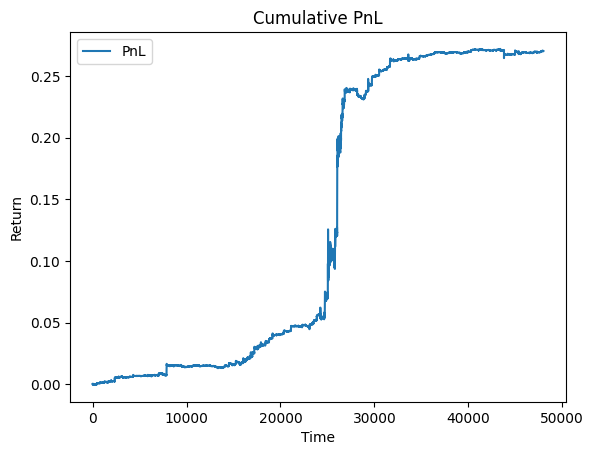

 14%|█▍        | 144/1000 [2:04:02<12:45:21, 53.65s/it]

Sharpe Ratio for the epoch: 6.2275
Average Weights:



,Weight
Cash,9.352105e-01
FFIV,8.698492e-03
IP,6.010898e-03
SNA,5.906745e-03
IBM,5.668337e-03
...,...
TEL,4.746653e-12
ROST,4.699856e-12
DOW,4.631595e-12
BBY,4.120199e-12


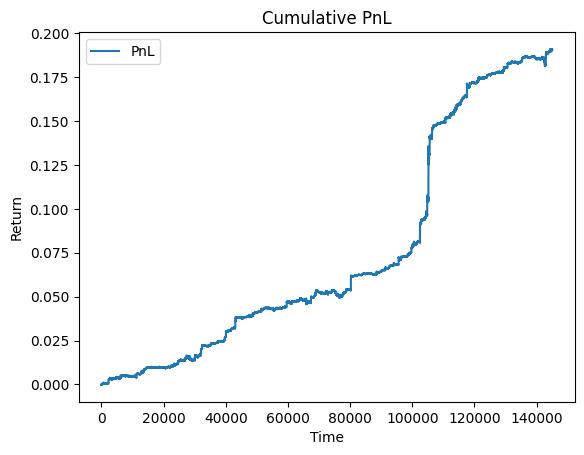

Sharpe Ratio for the epoch: 5.3104
Average Weights:



,Weight
Cash,8.987253e-01
SNA,2.152053e-02
IP,1.151507e-02
GWW,1.003946e-02
FFIV,9.020151e-03
...,...
AAL,4.981611e-12
ROST,4.928175e-12
DOW,4.857636e-12
BBY,4.303485e-12


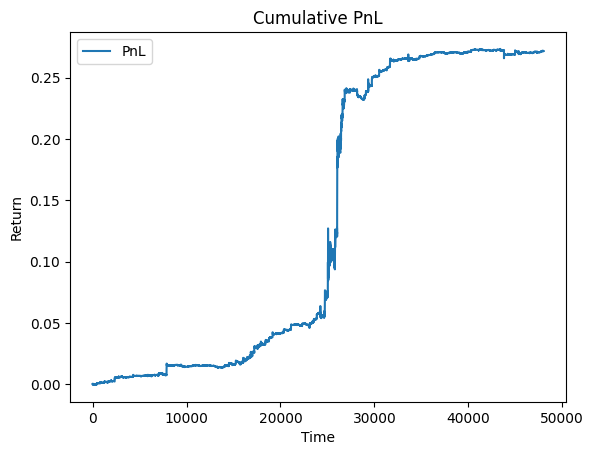

 15%|█▍        | 149/1000 [2:08:19<12:04:46, 51.10s/it]

Sharpe Ratio for the epoch: 6.3075
Average Weights:



,Weight
Cash,9.351916e-01
FFIV,8.643021e-03
IP,5.943263e-03
SNA,5.876154e-03
IBM,5.634244e-03
...,...
TEL,3.331091e-12
ROST,3.296153e-12
DOW,3.243983e-12
BBY,2.888843e-12


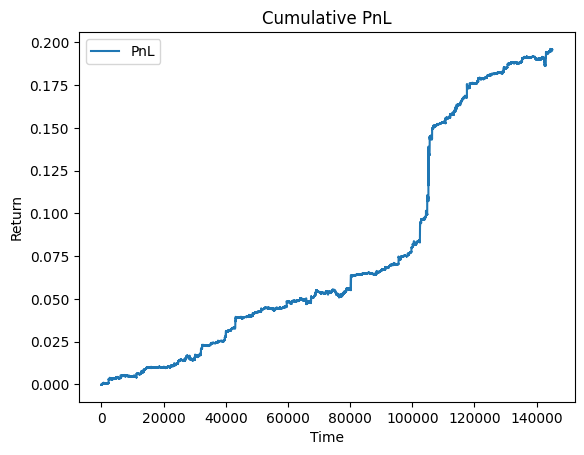

Sharpe Ratio for the epoch: 5.3145
Average Weights:



,Weight
Cash,8.980580e-01
SNA,2.147989e-02
IP,1.142331e-02
GWW,1.008956e-02
FFIV,9.053843e-03
...,...
AAL,3.492489e-12
ROST,3.467431e-12
DOW,3.412739e-12
BBY,3.026477e-12


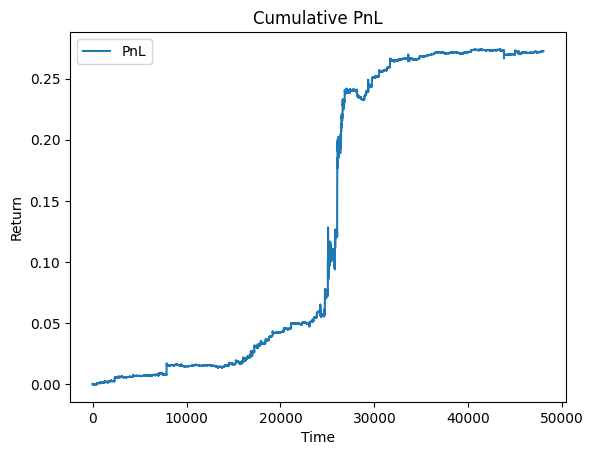

 15%|█▌        | 154/1000 [2:12:37<12:06:34, 51.53s/it]

Sharpe Ratio for the epoch: 6.3859
Average Weights:



,Weight
Cash,9.351008e-01
FFIV,8.603864e-03
IP,5.887969e-03
SNA,5.855848e-03
IBM,5.590185e-03
...,...
AAL,2.346016e-12
ROST,2.329828e-12
DOW,2.286920e-12
BBY,2.040379e-12


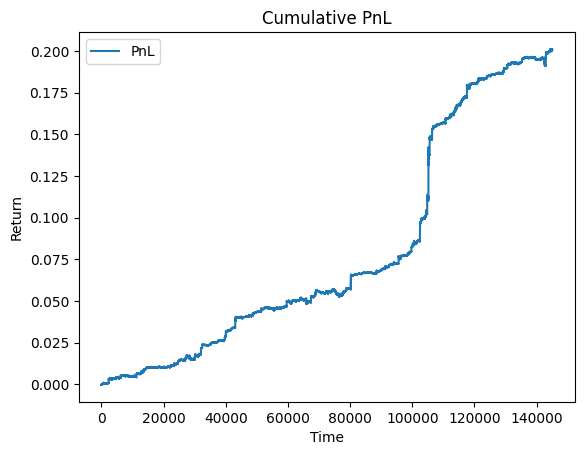

Sharpe Ratio for the epoch: 5.3160
Average Weights:



,Weight
Cash,8.972852e-01
SNA,2.146554e-02
IP,1.136877e-02
GWW,1.014945e-02
FFIV,9.096690e-03
...,...
AAL,2.464230e-12
ROST,2.460041e-12
DOW,2.414507e-12
BBY,2.145163e-12


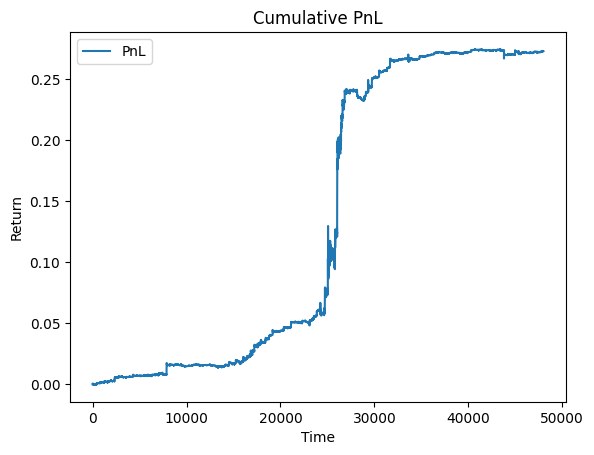

 16%|█▌        | 156/1000 [2:14:53<12:09:48, 51.88s/it]


KeyboardInterrupt: 

In [5]:
batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = len(picked_assets)
    break

print(f"cmf_dim: {cmf_dim}, asset_dim: {asset_dim}, num_assets: {num_assets}")

# model = DeepPortfolioAllocator_1(
#     cmf_dim=cmf_dim,
#     asset_dim=asset_dim,
#     num_assets=num_assets,
# )

model = SimplePortfolioAllocator(
    cmf_dim=cmf_dim,
    #asset_dim=asset_dim,
    num_assets=num_assets,
)

optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in tqdm(range(num_epochs)):
    if epoch in batch_size_config:
        print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
        batch_size = batch_size_config[epoch]
        pipeline = FeaturesPipeline(
            path_to_data,
            padding=padding,
            batch_size=batch_size,
            split_dates=split_dates,
            split_names=split_names
        )

    loss_fn = StreamingSharpeLoss(
        fee=fee,
        asset_names=picked_assets + ['Cash'] # pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
    )
    loss_fn.reset()
    pipeline.reset()
    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        
        fut_ret = fut_ret[picked_assets]  # Фильтруем только по выбранным активам
        min_prices = min_prices[picked_assets]  # Фильтруем только по выбранным активам
        market_caps = market_caps[picked_assets]

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        optimizer.zero_grad()

        # Вычисляем веса
        weights = model(common_feats, asset_feats)  # (T, n_assets)
        
        # Обновляем метрику
        loss_value = loss_fn.forward(
            weights=weights,
            returns=fut_ret,
            min_prices=min_prices,
            market_caps=market_caps
        )
        loss_value.backward()

        optimizer.step()

    if (epoch + 1) % log_freq == 0:
        _, weights_df = loss_fn.plot_whole_epoch_loss()  # Выводим Sharpe Ratio за эпоху
        weights_df.to_csv(f'weights_epoch_{epoch + 1}.csv')  # Сохраняем веса в CSV
    loss_fn.reset()  # Сбрасываем метрику для следующей эпохи

    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):

        fut_ret = fut_ret[picked_assets]  # Фильтруем только по выбранным активам
        min_prices = min_prices[picked_assets]
        market_caps = market_caps[picked_assets]

        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)

        if len(common_feats) != batch_size:
            continue

        weights = model(common_feats, asset_feats)
        loss_fn.forward(weights=weights, returns=fut_ret, min_prices=min_prices, market_caps=market_caps)

    if (epoch + 1) % log_freq == 0:
        loss_fn.plot_whole_epoch_loss()
    loss_fn.reset()

In [ ]:
interesting_assets = ['BKNG', 'FICO', 'GWW', 'AZO']

dct = {}

for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):
    common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
    asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
    fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
    min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
    market_caps = torch.tensor(market_caps,  dtype=torch.float32).to(device)

    if len(common_feats) != batch_size:
        continue

    weights = model(common_feats, asset_feats)
    
    for hor in [1, 5, 10, 20, 60]:
        fut_ret_hor = pd.DataFrame(
            fut_ret.detach().cpu().numpy(),
            columns=pipeline.reader.asset_names
        ).shift(-hor).reset_index(drop=True)

        weights_df = pd.DataFrame(
            weights.detach().cpu().numpy()[:, :-1],  # Убираем Cash
            columns=pipeline.reader.asset_names
        )

        weights_df = weights_df[fut_ret_hor.isna().sum(axis=1) == 0]  # Убираем активы, для которых нет будущих доходностей
        fut_ret_hor = fut_ret_hor[fut_ret_hor.isna().sum(axis=1) == 0]

        for asset in interesting_assets:
            if hor not in dct:
                dct[hor] = {}
            if asset not in dct[hor]:
                dct[hor][asset] = {}
            
            if 'weights' not in dct[hor][asset]:
                dct[hor][asset]['weights'] = []
                dct[hor][asset]['fut_ret'] = []

            dct[hor][asset]['weights'].extend(weights_df[asset].tolist())
            dct[hor][asset]['fut_ret'].extend(fut_ret_hor[asset].tolist())

    #         print(f'For asset {asset} at horizon {hor} minutes: Corr = '
    #               f'{weights_df[asset].corr(fut_ret_hor[asset]):.4f})')
    #     print()
    # print()
dct

{1: {'BKNG': {'weights': [0.16442978382110596,
    0.02194208651781082,
    0.21527691185474396,
    0.1949617862701416,
    0.09318862110376358,
    0.12841227650642395,
    0.05433095991611481,
    0.027566658332943916,
    0.05343879386782646,
    0.11364799737930298,
    0.02651677280664444,
    0.05344570055603981,
    0.05119584500789642,
    0.005405851174145937,
    0.2031354010105133,
    0.08682043850421906,
    0.11399022489786148,
    0.11715784668922424,
    0.0815720334649086,
    0.15345562994480133,
    0.047921981662511826,
    0.055081527680158615,
    0.005914127454161644,
    0.01362829003483057,
    0.012531246989965439,
    0.02177036926150322,
    0.0050817527808249,
    0.022087642922997475,
    0.0028341743163764477,
    0.018621545284986496,
    0.00025771415675990283,
    0.013876824639737606,
    0.012211414985358715,
    0.07246901094913483,
    0.03908181190490723,
    0.03939085826277733,
    0.10840768367052078,
    0.020003212615847588,
    0.0034329711

In [ ]:
for hor in dct:
    print(f'Horizon: {hor} minutes')
    for asset in interesting_assets:
        if asset in dct[hor]:
            weights = dct[hor][asset]['weights']
            fut_ret = dct[hor][asset]['fut_ret']
            if len(weights) > 0 and len(fut_ret) > 0:
                corr = pd.Series(weights).corr(pd.Series(fut_ret))
                print(f'Asset: {asset}, Correlation: {corr:.4f}')
            else:
                print(f'Asset: {asset}, No data available')
    print()
    print('-' * 40)


Horizon: 1 minutes
Asset: BKNG, Correlation: 0.0514
Asset: FICO, Correlation: 0.0581
Asset: GWW, Correlation: 0.0518
Asset: AZO, Correlation: 0.0414

----------------------------------------
Horizon: 5 minutes
Asset: BKNG, Correlation: 0.0098
Asset: FICO, Correlation: 0.0178
Asset: GWW, Correlation: -0.0016
Asset: AZO, Correlation: 0.0144

----------------------------------------
Horizon: 10 minutes
Asset: BKNG, Correlation: 0.0050
Asset: FICO, Correlation: 0.0083
Asset: GWW, Correlation: 0.0009
Asset: AZO, Correlation: -0.0028

----------------------------------------
Horizon: 20 minutes
Asset: BKNG, Correlation: 0.0024
Asset: FICO, Correlation: 0.0049
Asset: GWW, Correlation: 0.0014
Asset: AZO, Correlation: -0.0011

----------------------------------------
Horizon: 60 minutes
Asset: BKNG, Correlation: 0.0011
Asset: FICO, Correlation: 0.0004
Asset: GWW, Correlation: -0.0027
Asset: AZO, Correlation: 0.0003

----------------------------------------
